In [113]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.stats import entropy
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
df_1 = pd.read_csv('change_point_example_3.csv', sep=',')

In [3]:
def average_smoothing(time_series, window):
    return(np.convolve(time_series, np.ones((window,))/window, mode='valid'))

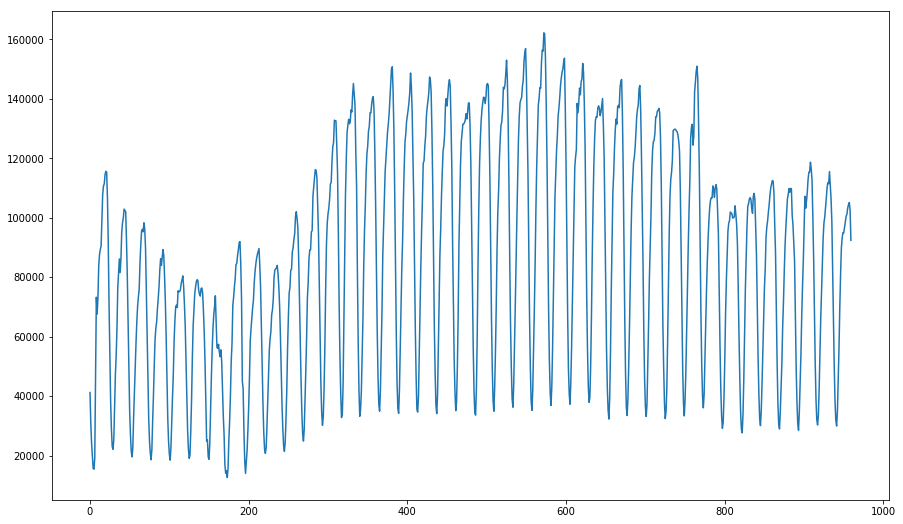

In [74]:
plt.figure(figsize = (15,9))
ts = df_1.loc[df_1['change_point_type'] == 'normal', 'impressions'].reset_index()['impressions']
plt.plot(ts)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/001_normal_1.png')
plt.show()

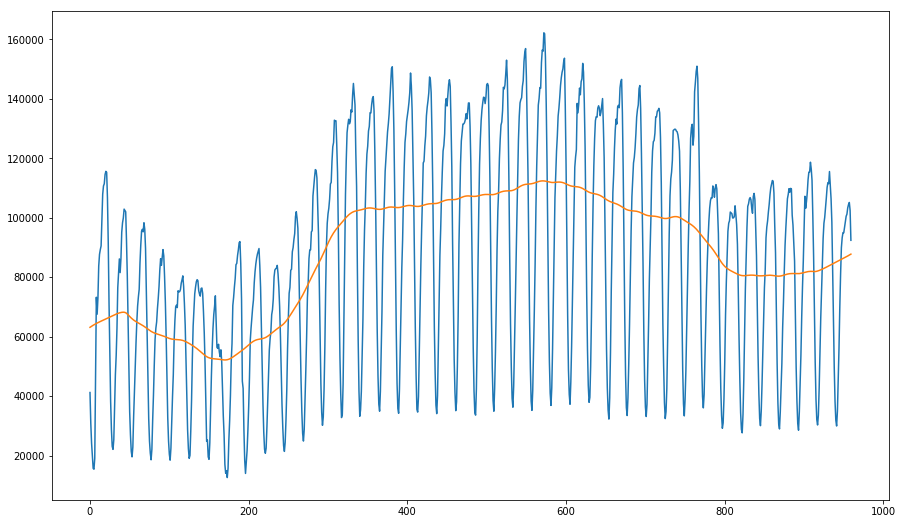

In [75]:
plt.figure(figsize = (15,9))
ts = df_1.loc[df_1['change_point_type'] == 'normal', 'impressions'].reset_index()['impressions']
plt.plot(ts)
plt.plot(lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/001_normal_2.png')
plt.show()

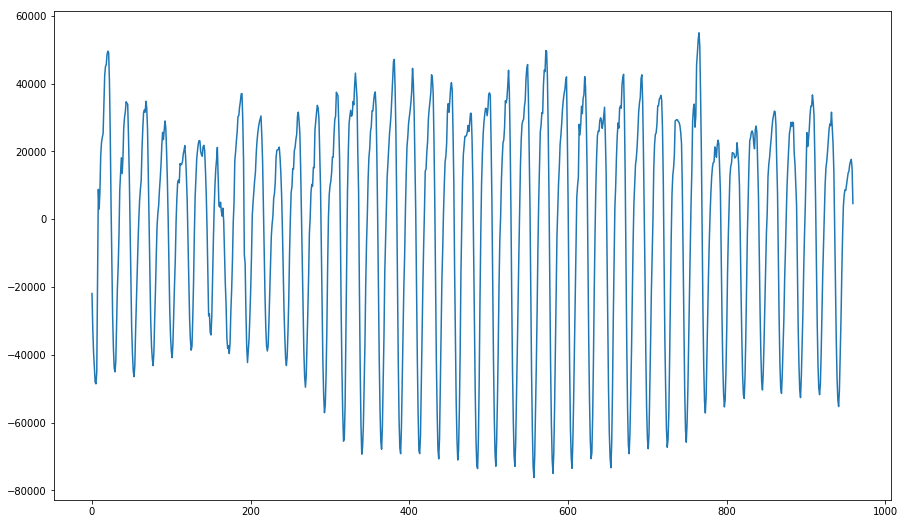

In [76]:
plt.figure(figsize = (15,9))
ts = df_1.loc[df_1['change_point_type'] == 'normal', 'impressions'].reset_index()['impressions']
plt.plot(ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/001_normal_3.png')
plt.show()

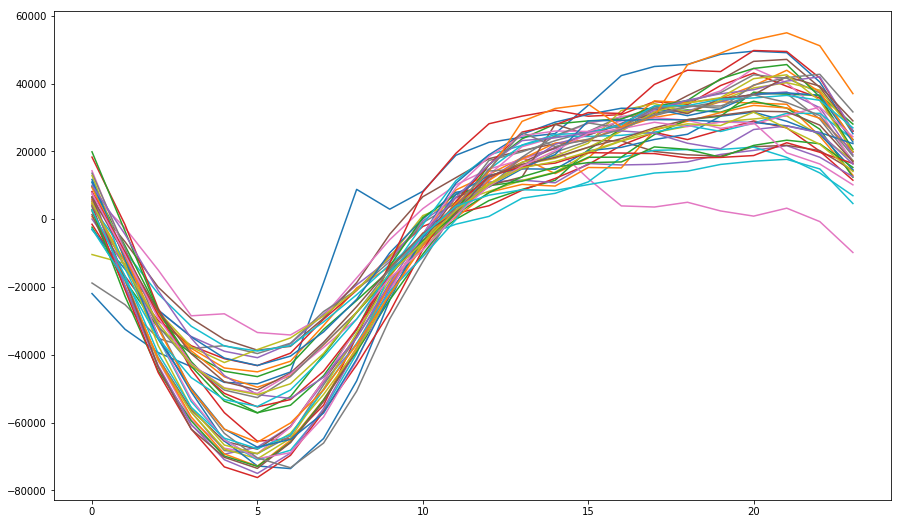

In [77]:
df = df_1.loc[df_1['change_point_type'] == 'normal', ['event_hourly_time', 'impressions']].copy()
df['impressions'] = (ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)).values
df['event_hourly_time'] = pd.to_datetime(df.event_hourly_time)
df = df.set_index('event_hourly_time')

df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
data_by_day = df.resample('h').mean().set_index(['month','day', 'hour']).unstack(['month','day'])
plt.figure(figsize = (15,9))
plt.plot(data_by_day['impressions'])
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/001_normal_4.png')
plt.show()

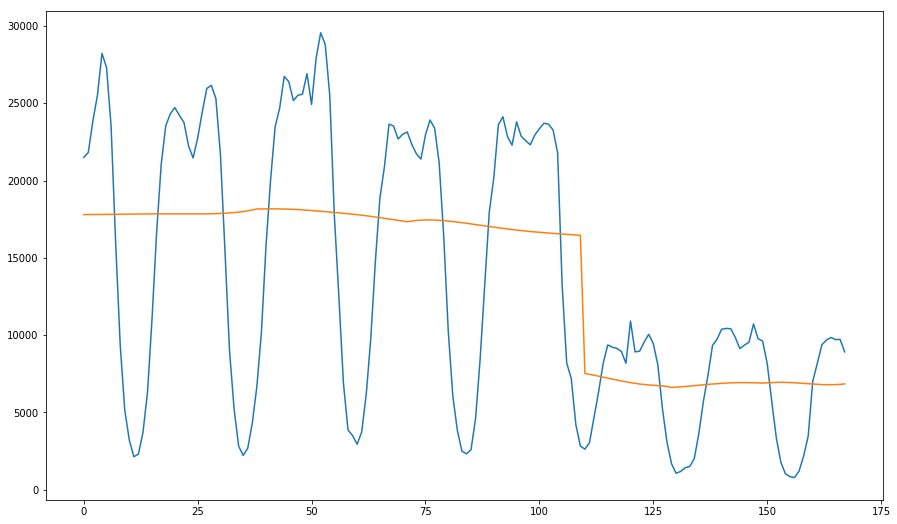

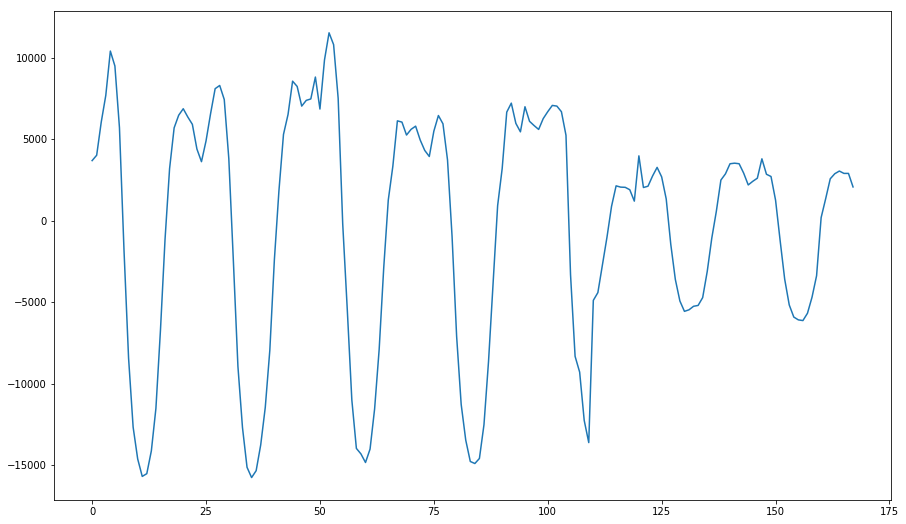

In [78]:
plt.figure(figsize = (15,9))
ts = df_1.loc[df_1['change_point_type'] == 'mean', 'impressions'].reset_index()['impressions']
plt.plot(ts)
plt.plot(np.hstack(
            (lowess(ts[0:110], range(0,len(ts[0:110])), frac=0.7, return_sorted=False, is_sorted=True),
             lowess(ts[110:], range(0,len(ts[110:])), frac=0.7, return_sorted=False, is_sorted=True))))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/002_mean.png')
plt.show()

plt.figure(figsize = (15,9))
plt.plot(ts - np.hstack(
            (lowess(ts[0:110], range(0,len(ts[0:110])), frac=0.7, return_sorted=False, is_sorted=True),
             lowess(ts[110:], range(0,len(ts[110:])), frac=0.7, return_sorted=False, is_sorted=True))))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/003_variance.png')
plt.show()

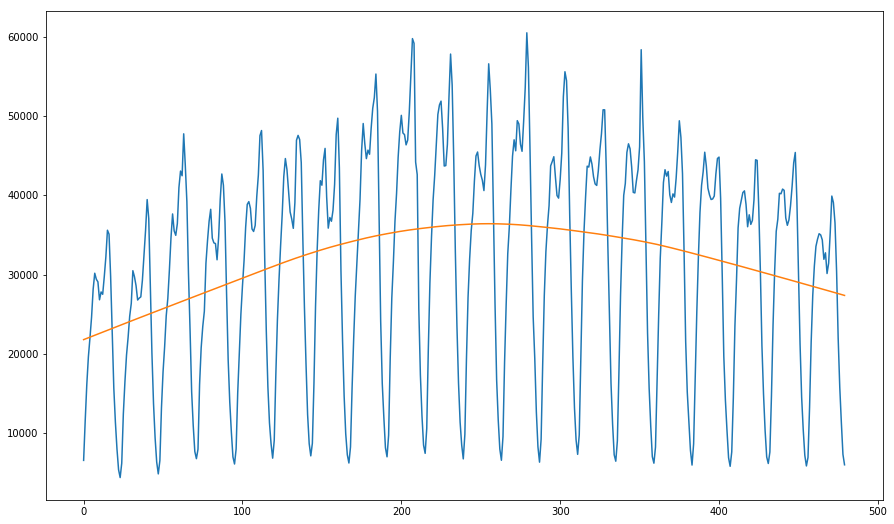

In [79]:
plt.figure(figsize = (15,9))
ts = df_1.loc[df_1['change_point_type'] == 'trend', 'impressions'].reset_index()['impressions']
plt.plot(ts)
plt.plot(lowess(ts, range(0,len(ts)), frac=0.5, return_sorted=False, is_sorted=True))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/004_trend.png')
plt.show()

In [137]:
# plt.figure(figsize = (15,9))
# plt.plot(df_1.loc[df_1['change_point_type'] == 'variance', 'impressions'].reset_index()['impressions'])
# # plt.plot(average_smoothing(df_1.loc[df_1['change_point_type'] == 'variance', 'impressions'],24))
# plt.show()

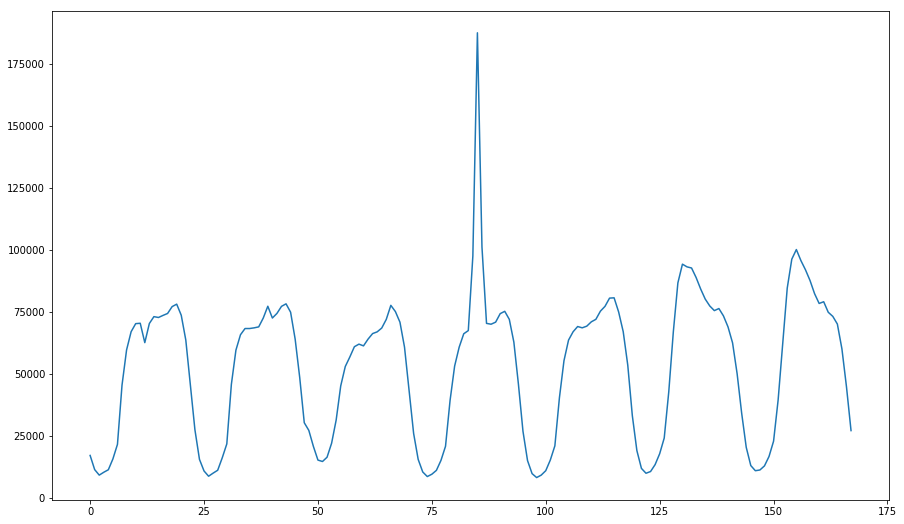

In [80]:
plt.figure(figsize = (15,9))
plt.plot(df_1.loc[df_1['change_point_type'] == 'point', 'impressions'].reset_index()['impressions'])
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/005_point.png')
plt.show()

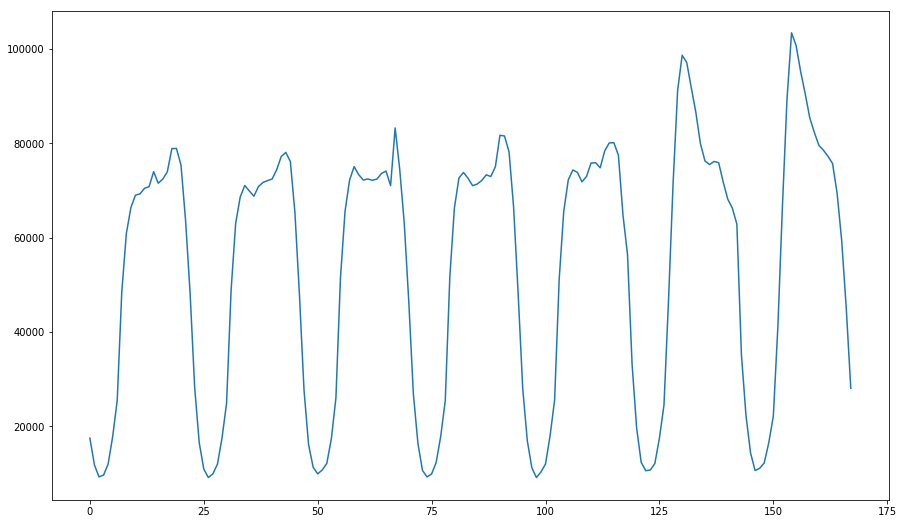

In [81]:
plt.figure(figsize = (15,9))
plt.plot(df_1.loc[df_1['change_point_type'] == 'period', 'impressions'].reset_index()['impressions'])
# plt.title('Trend change', fontsize=20)
# plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/001_trend_change.png')
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/006_structure.png')
plt.show()

In [117]:
df_2 = pd.read_csv('case_1.csv', sep=',')

In [118]:
df_2.head()

,app_type,tx_datetime,requests
0,clean app,2018-06-22T00:00:00,444
1,clean app,2018-06-22T00:01:00,404
2,clean app,2018-06-22T00:02:00,382
3,clean app,2018-06-22T00:03:00,389
4,clean app,2018-06-22T00:04:00,391


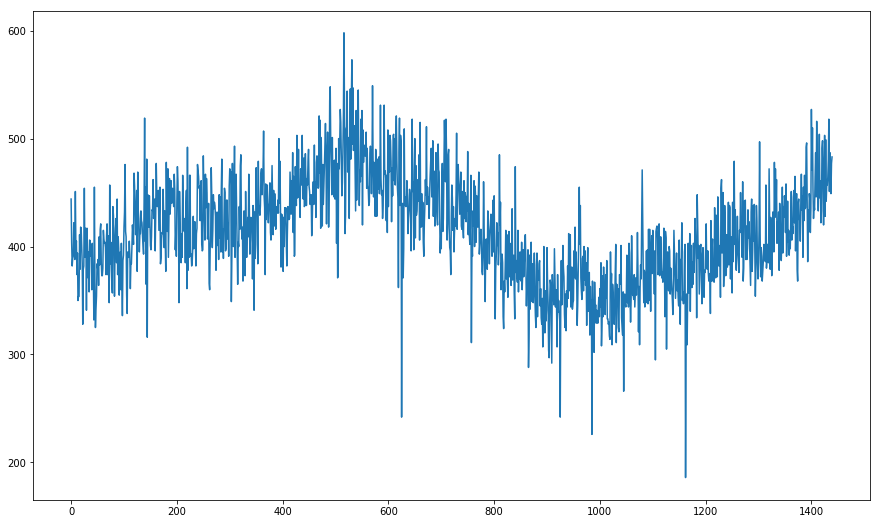

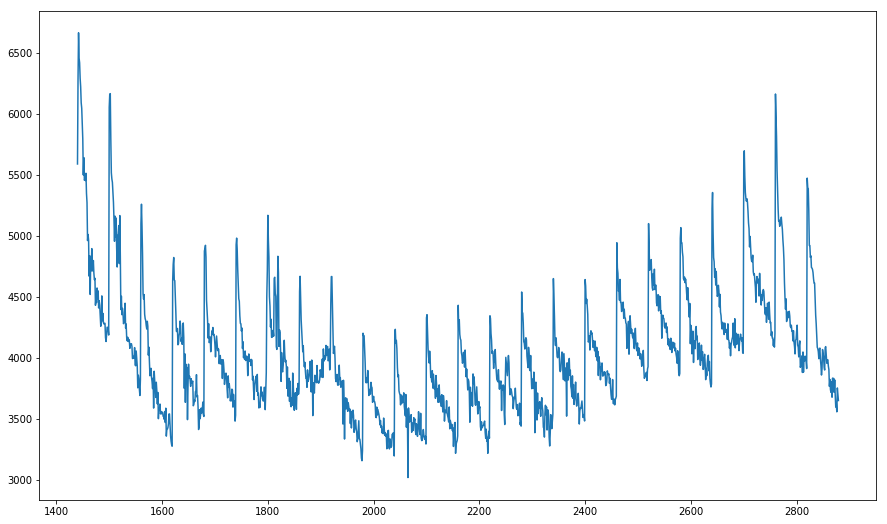

In [124]:
plt.figure(figsize = (15,9))
plt.plot(df_2.loc[df_2['app_type'] == 'clean app','requests'])
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/007_case_1.png')
plt.show()

plt.figure(figsize = (15,9))
plt.plot(df_2.loc[df_2['app_type'] == 'fraud app','requests'])
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/008_case_1.png')
plt.show()

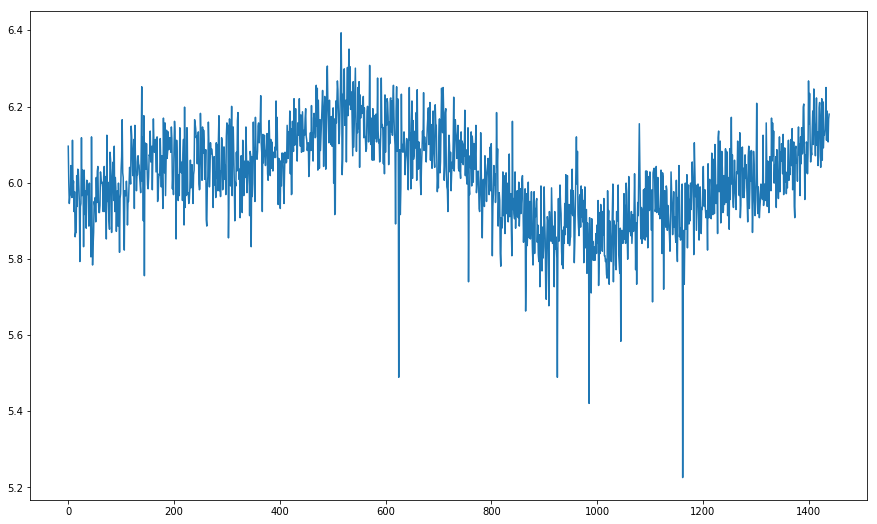

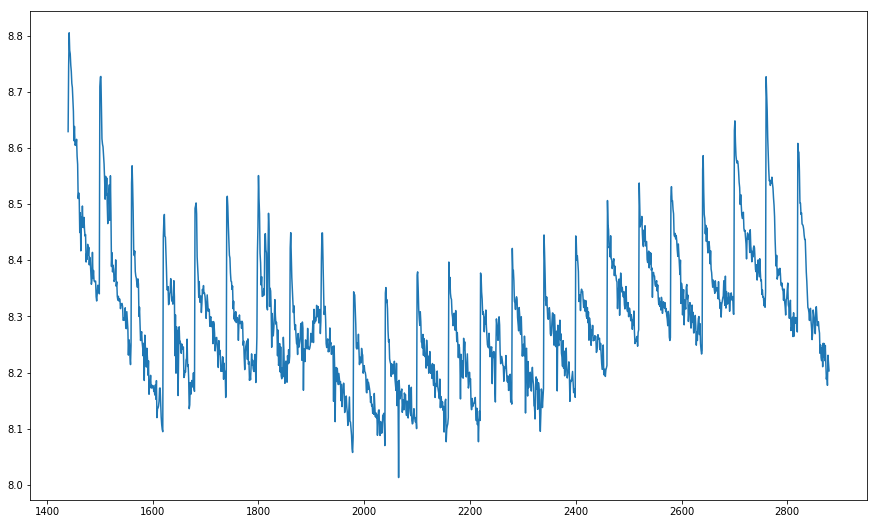

In [125]:
plt.figure(figsize = (15,9))
plt.plot(np.log(df_2.loc[df_2['app_type'] == 'clean app','requests']))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/009_case_1.png')
plt.show()

plt.figure(figsize = (15,9))
plt.plot(np.log(df_2.loc[df_2['app_type'] == 'fraud app','requests']))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/010_case_1.png')
plt.show()

In [98]:
# plt.figure(figsize = (15,9))
# ts = df_2.loc[df_2['app_type'] == 'clean app','requests']
# plt.plot(ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
# # plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/009_1_case_3.png')
# plt.show()

# plt.figure(figsize = (15,9))
# ts = df_2.loc[df_2['app_type'] == 'fraud app','requests']
# plt.plot(ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
# # plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/009_1_case_3.png')
# plt.show()

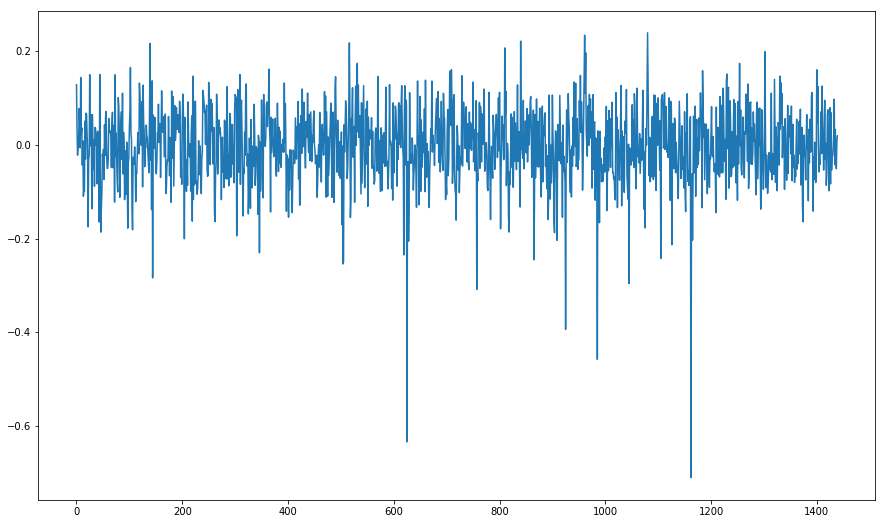

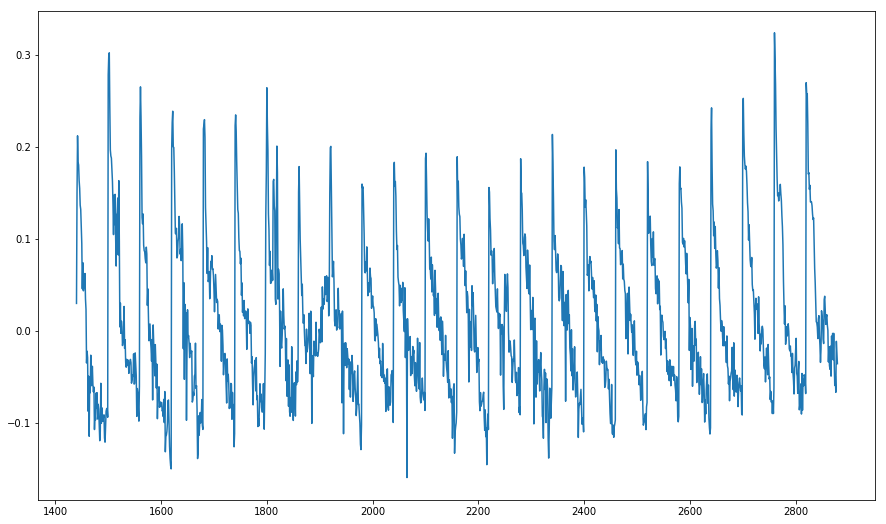

In [126]:
plt.figure(figsize = (15,9))
ts = np.log(df_2.loc[df_2['app_type'] == 'clean app','requests'])
plt.plot(ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/011_case_1.png')
plt.show()

plt.figure(figsize = (15,9))
ts = np.log(df_2.loc[df_2['app_type'] == 'fraud app','requests'])
plt.plot(ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/012_case_1.png')
plt.show()

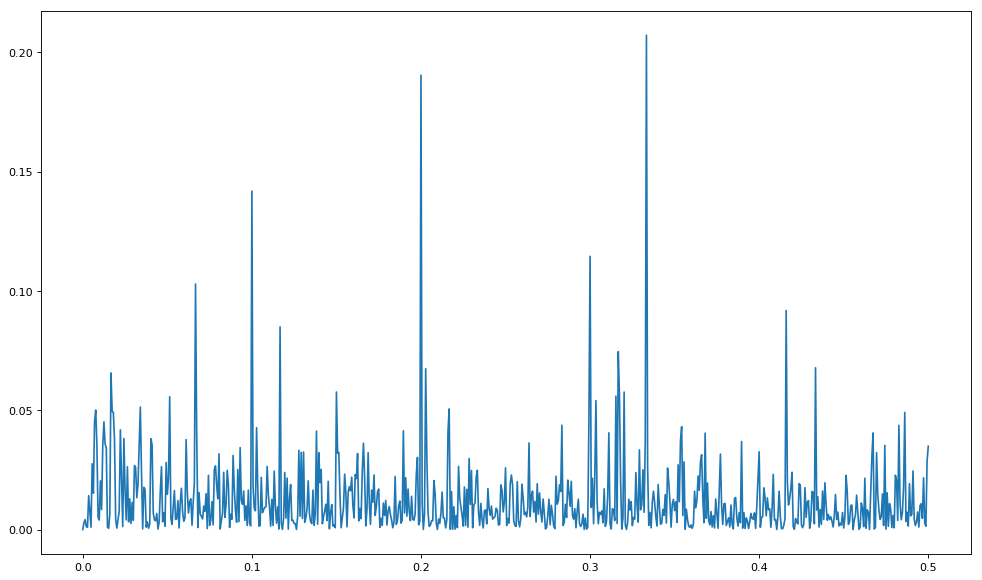

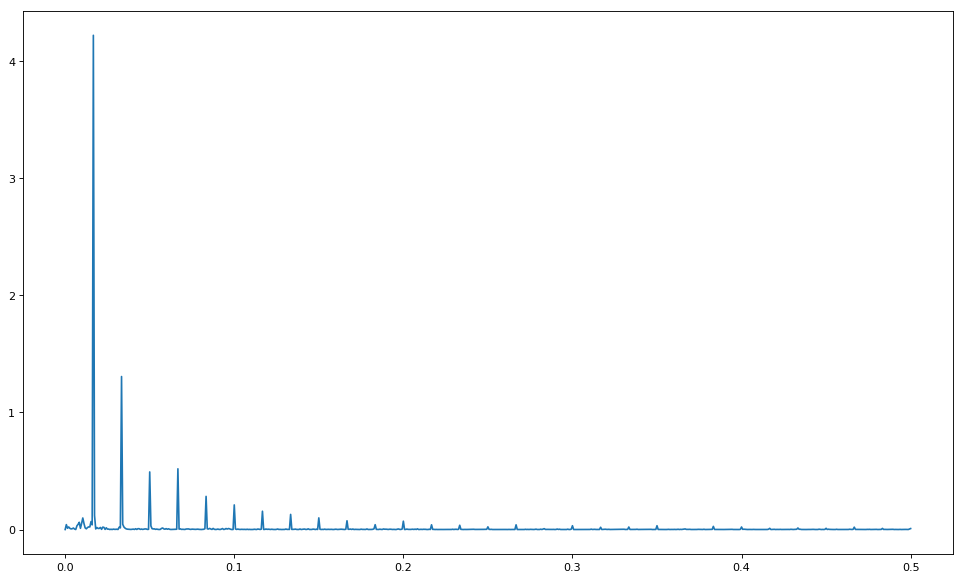

In [127]:
plt.figure(figsize=(15, 9), dpi=80)
ts = np.log(df_2.loc[df_2['app_type'] == 'clean app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, Pxx_den = signal.periodogram(ts)
plt.plot(f, Pxx_den)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/013_case_1.png')
plt.show()

plt.figure(figsize=(15, 9), dpi=80)
ts = np.log(df_2.loc[df_2['app_type'] == 'fraud app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, Pxx_den = signal.periodogram(ts)
plt.plot(f, Pxx_den)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/014_case_1.png')
plt.show()

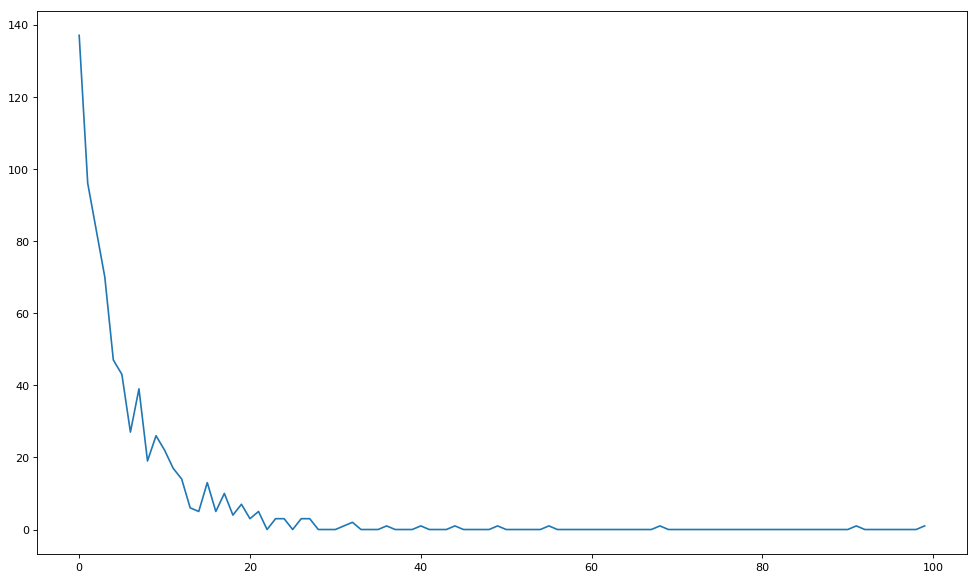

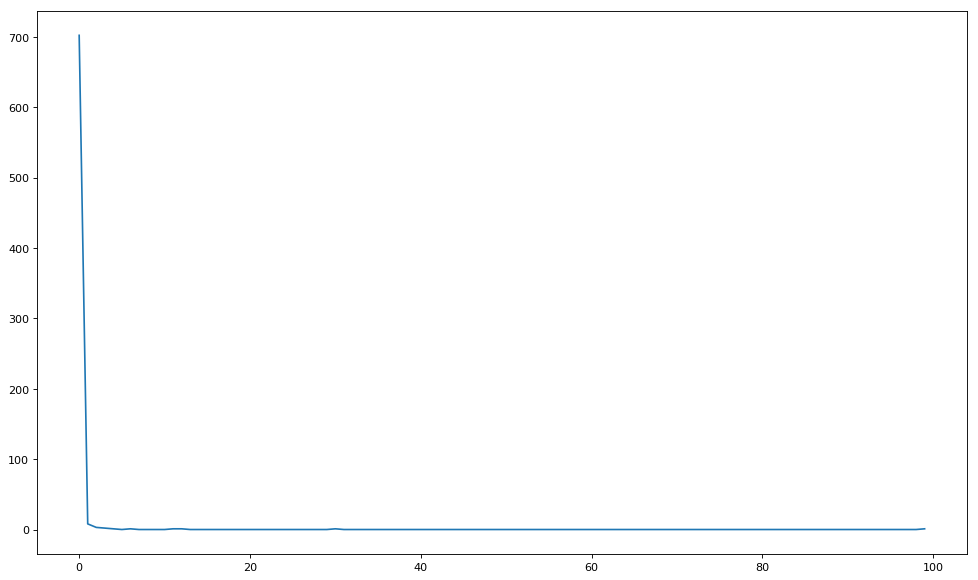

In [128]:
plt.figure(figsize=(15, 9), dpi=80)
ts = np.log(df_2.loc[df_2['app_type'] == 'clean app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, ts = signal.periodogram(ts)
ts = (ts-min(ts))/(max(ts)-min(ts))
ts = np.histogram(ts, bins = 100, density=False)[0]
plt.plot(ts)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/015_case_1.png')
plt.show()

plt.figure(figsize=(15, 9), dpi=80)
ts = np.log(df_2.loc[df_2['app_type'] == 'fraud app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, ts = signal.periodogram(ts)
ts = (ts-min(ts))/(max(ts)-min(ts))
ts = np.histogram(ts, bins = 100, density=False)[0]
plt.plot(ts)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/016_case_1.png')
plt.show()

In [111]:
mean = 0
std = 1 
# num_samples = 661*2-1
num_samples = 1000000
white_noise_sample = np.random.normal(mean, std, size=num_samples)
f, Pxx_den_noise = signal.periodogram(white_noise_sample)
normalized_noise = (Pxx_den_noise-min(Pxx_den_noise))/(max(Pxx_den_noise)-min(Pxx_den_noise))
normalized_counts = np.histogram(normalized_noise, bins = 100, density=False)[0]

In [116]:
ts = np.log(df_2.loc[df_2['app_type'] == 'clean app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, ts = signal.periodogram(ts)
ts = (ts-min(ts))/(max(ts)-min(ts))
ts = np.histogram(ts, bins = 100, density=False)[0]
result_clean = entropy(pk = ts+0.0001, qk = normalized_counts+0.001)

ts = np.log(df_2.loc[df_2['app_type'] == 'fraud app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, ts = signal.periodogram(ts)
ts = (ts-min(ts))/(max(ts)-min(ts))
ts = np.histogram(ts, bins = 100, density=False)[0]
result_fraud = entropy(pk = ts+0.0001, qk = normalized_counts+0.001)

print(result_clean, result_fraud)

0.08975031434253808 1.866830787400989
